In [1]:
# Importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame


In [2]:
# Reading data
data = pd.read_csv("quora_duplicate_questions.tsv", sep="\t")

In [3]:
# cleaning of the data

from ipynb.fs.full.Data_preprocessing import clean

data['question1'] = data['question1'].apply(clean)
data['question2'] = data['question2'].apply(clean)

In [4]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 0)

In [5]:
from nltk.tokenize import wordpunct_tokenize as tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine

In [6]:
tfidf_vect = TfidfVectorizer(max_features = 50000)
tfidf_vect.fit( pd.Series(list(train_data['question1']) + list(train_data['question2'])).astype(str).unique() )
tfidf_1 = tfidf_vect.transform(train_data['question1'])
tfidf_2 = tfidf_vect.transform(train_data['question2'])

In [7]:
def cosine_similarity(tfidf_1, tfidf_2):
    return cosine(tfidf_1.todense(),tfidf_2.todense())



In [8]:
similarity = []

for i in range(0, tfidf_1.shape[0]):
    ans = cosine_similarity(tfidf_1[i], tfidf_2[i])
    similarity.append(ans)


/home/rg99/anaconda3/lib/python3.6/site-packages/scipy/spatial/distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [97]:
def accuracy(similarity, train_data, threshold):
    similar = list( [1 if i>threshold else 0 for i in similarity] )
    X = list(train_data['is_duplicate'])
    false_pos =0
    false_neg=0
    true_pos=0
    true_neg=0

    for i in range(0, len(X)):
        if(X[i]== similar[i]):
            if X[i]==1:
                true_pos =1+true_pos
            else:
                true_neg = 1+true_neg
        else:
            if X[i]==1:
                false_neg =1+false_neg
            else:
                false_pos  = 1+false_pos
        
    acc = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
    acc*=100
    print(acc)
    return acc      

In [101]:
x = np.linspace(-0,1,10)

In [102]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

36.8236379119656
34.68373126786642
35.087967265364675
34.42472341282601
33.53038660367558
34.70846598799306
39.06071667084801
45.63909216510073
51.421363024420245
63.13254629809578


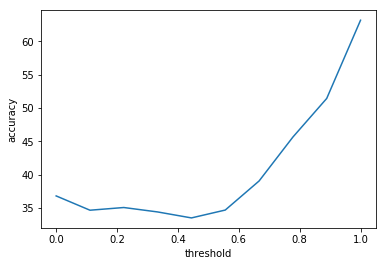

In [103]:
y = []

for i in x:
    y.append(accuracy(similarity, train_data, i))
    
plt.plot(x,y)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()